# 口袋妖怪数据集探索

## 数据集下载


In [2]:
!wget -O pokemon_data.csv https://pai-public-data.oss-cn-beijing.aliyuncs.com/pokemon/pokemon.csv

--2020-08-12 10:59:23--  https://pai-public-data.oss-cn-beijing.aliyuncs.com/pokemon/pokemon.csv
Resolving pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)... 47.95.85.22
Connecting to pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)|47.95.85.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160616 (157K) [text/csv]
Saving to: 'pokemon_data.csv'

100%[======================================>] 160,616     --.-K/s   in 0.08s   

2020-08-12 10:59:24 (1.91 MB/s) - 'pokemon_data.csv' saved [160616/160616]



In [7]:
!pip install seaborn --user -q

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [9]:
df = pd.read_csv("./pokemon_data.csv")

In [10]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [12]:
# 计算出每个特征有多少百分比是缺失的
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})

In [13]:
missing_value_df.sort_values(by='percent_missing', ascending=False).head(10)

,column_name,percent_missing
type2,type2,47.940075
percentage_male,percentage_male,12.234707
weight_kg,weight_kg,2.496879
height_m,height_m,2.496879
name,name,0.000000
capture_rate,capture_rate,0.000000
classfication,classfication,0.000000
defense,defense,0.000000
experience_growth,experience_growth,0.000000
hp,hp,0.000000


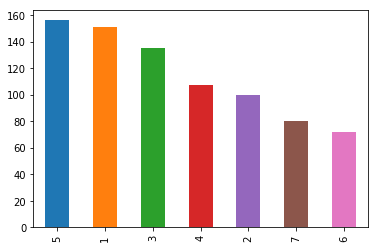

In [24]:
# 查看各代口袋妖怪的数量
df['generation'].value_counts().sort_values(ascending=False).plot.bar()


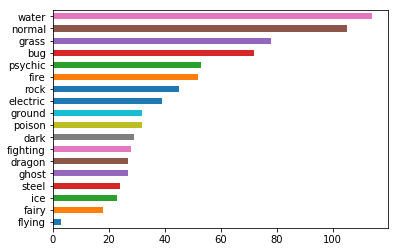

In [10]:
# 查看每个系口袋妖怪的数量
df['type1'].value_counts().sort_values(ascending=True).plot.barh()

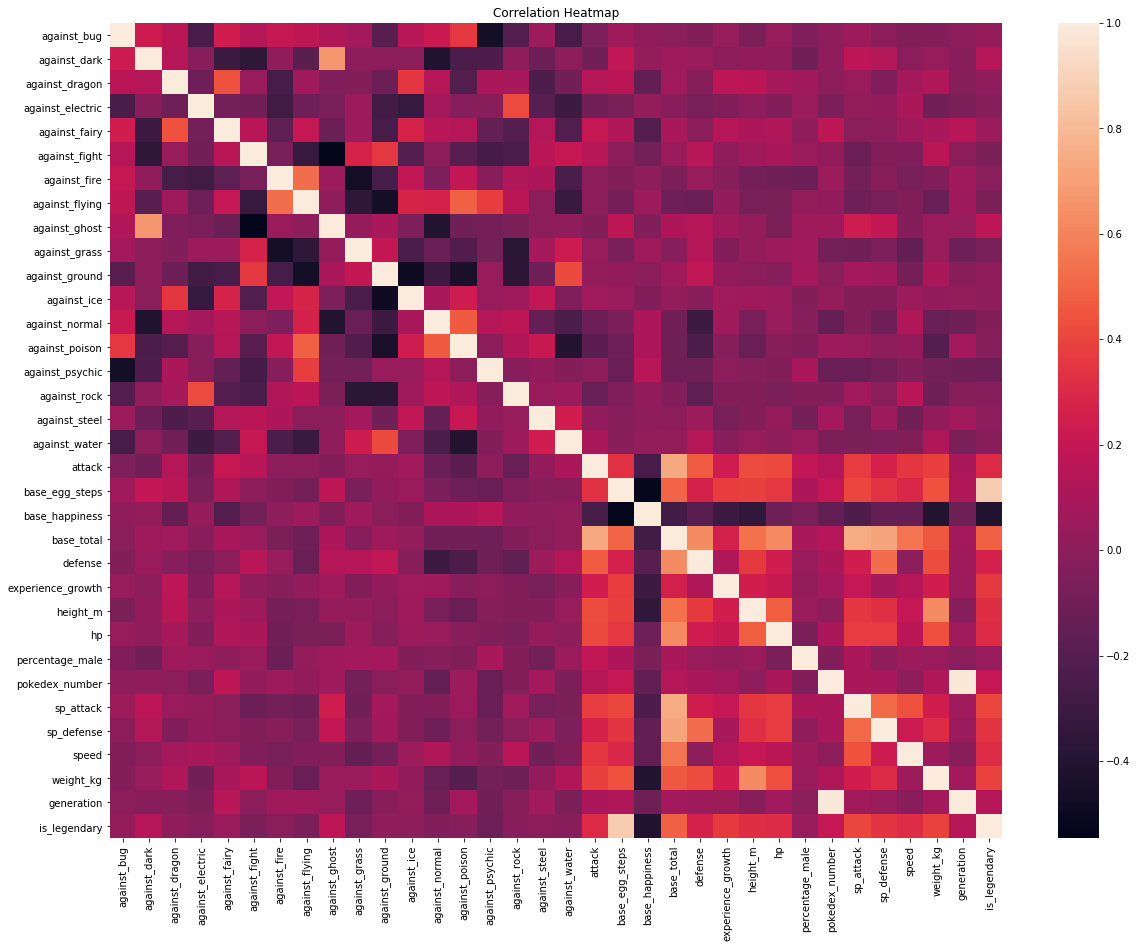

In [11]:
# 相关性热力图分析
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

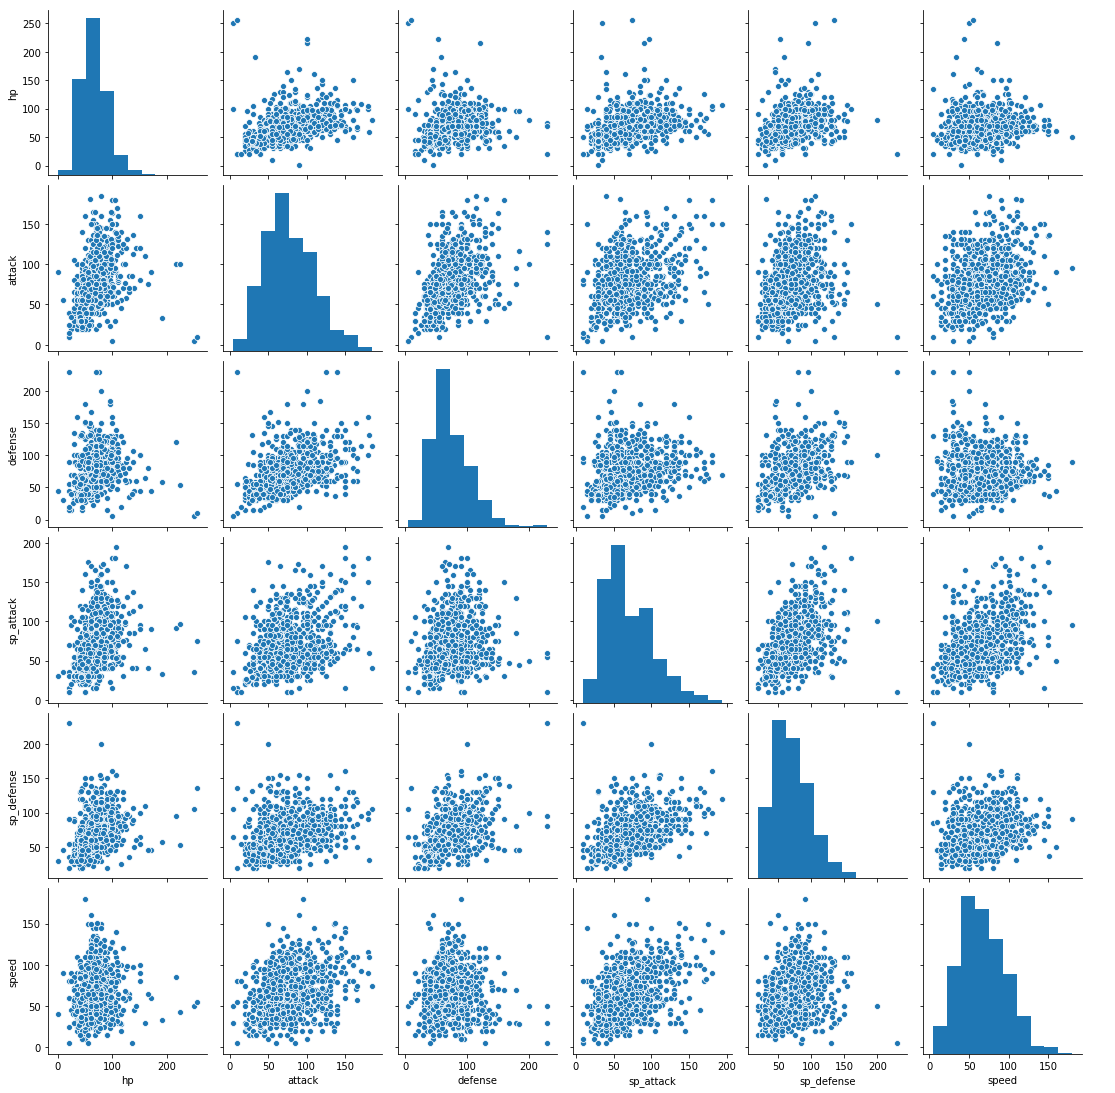

In [27]:
interested = ['hp','attack','defense','sp_attack','sp_defense','speed']
sns.pairplot(df[interested])

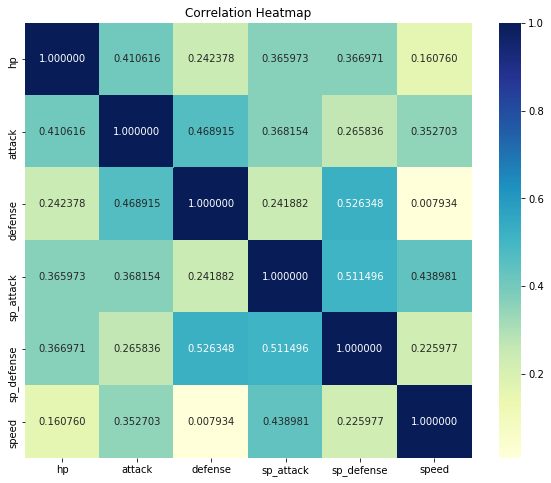

In [29]:
# 通过相关性分析heatmap分析五个基础属性
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df[interested].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt="f",cmap="YlGnBu")

In [30]:
for c in interested:
    df[c] = df[c].astype(float)

In [31]:
df = df.assign(total_stats = df[interested].sum(axis=1)) 

In [32]:
df[df.total_stats >= 525].shape

(167, 42)

Text(0, 0.5, 'Frequency')

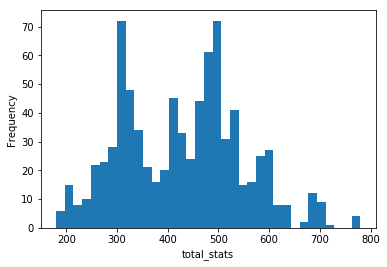

In [33]:
# 种族值分布
total_stats = df.total_stats
plt.hist(total_stats,bins=35)
plt.xlabel('total_stats')
plt.ylabel('Frequency')

2        Venusaur
5       Charizard
8       Blastoise
17        Pidgeot
64       Alakazam
79        Slowbro
93         Gengar
114    Kangaskhan
126        Pinsir
129      Gyarados
Name: name, dtype: object

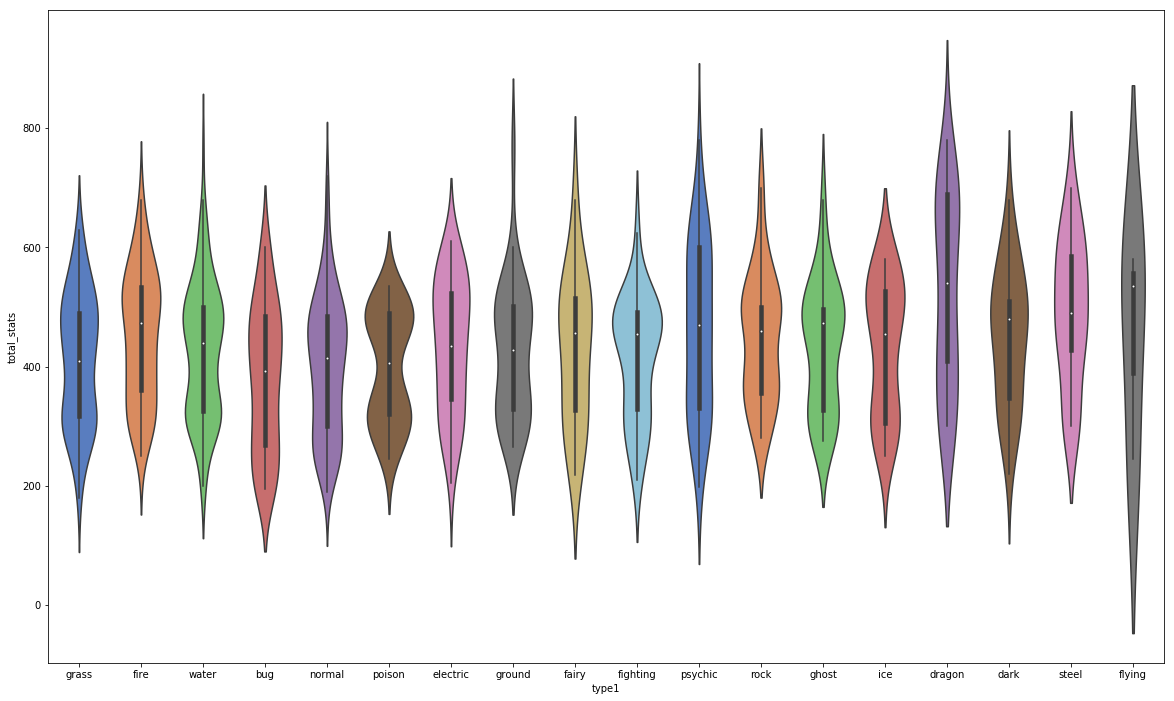

In [35]:
plt.subplots(figsize=(20,12))
ax = sns.violinplot(x="type1", y="total_stats",
                    data=df, palette="muted")

In [36]:
# 种族值大于570的，但是不是神兽的
df[(df.total_stats >= 570) & (df.is_legendary == 0)]['name'].head(10)

2        Venusaur
5       Charizard
8       Blastoise
17        Pidgeot
64       Alakazam
79        Slowbro
93         Gengar
114    Kangaskhan
126        Pinsir
129      Gyarados
Name: name, dtype: object

# 其他有意思的分析

/home/admin/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


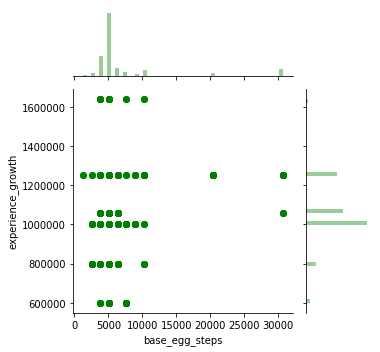

In [20]:
sns.jointplot("base_egg_steps", "experience_growth", data=df, size=5, ratio=3, color="g")

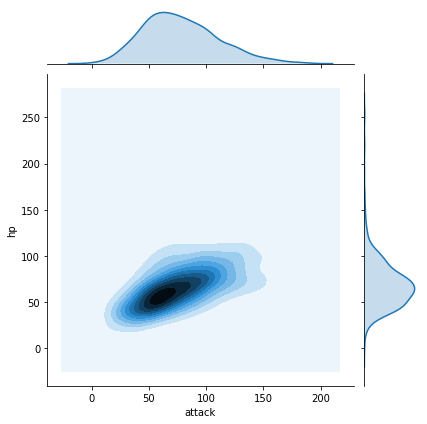

In [21]:
sns.jointplot("attack", "hp", data=df, kind="kde")

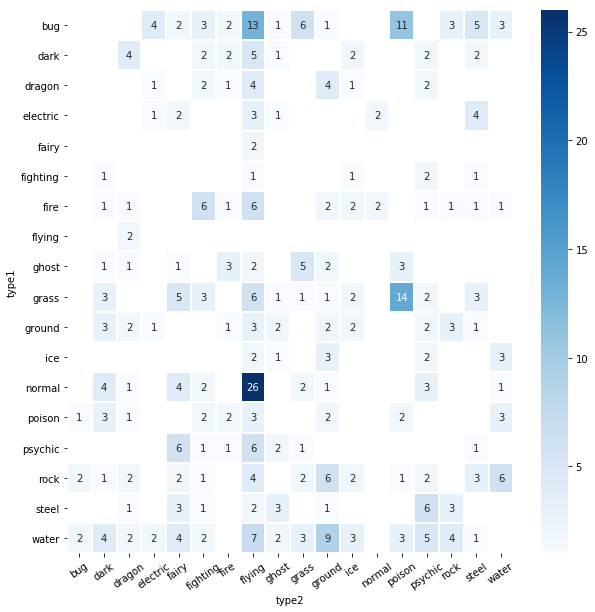

In [22]:
# 双系宝可梦数量统计
plt.subplots(figsize=(10, 10))

sns.heatmap(
    df[df['type2']!='None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()